In [1]:
import pandas as pd
import numpy as np
import scipy.io as sio
import scipy.stats
import matplotlib.pyplot as plt
import math
import time

## Q1

In [18]:
def CalculateLikelihood(spam_ham, obs, lld_spam_1, lld_spam_2, lld_ham_1, lld_ham_2):
    prob_product = 1
    for i in np.arange(len(obs)):
        if (int(obs[i])==1) & (spam_ham == 1):
            prob_product *= lld_spam_1[i]
        elif (int(obs[i])==0) & (spam_ham == 1):
            prob_product *= lld_spam_2[i]
        elif (int(obs[i])==1) & (spam_ham == 0):
            prob_product *= lld_ham_1[i]
        else:
            prob_product *= lld_ham_2[i]
    return prob_product

def NaiveBayesClassifier(obs, lld_spam_1, lld_spam_2, lld_ham_1, lld_ham_2, prior):
    # Calculate the posterior probabilities of spam
    posterior_spam = CalculateLikelihood(1, obs, lld_spam_1, lld_spam_2, lld_ham_1, lld_ham_2) * prior[0]
    # Calculate the posterior probabilities of ham
    posterior_ham = CalculateLikelihood(0, obs, lld_spam_1, lld_spam_2, lld_ham_1, lld_ham_2) * prior[1] 
    if posterior_ham >= posterior_spam:
        return 0
    else:
        return 1

In [24]:
# load the training data 
x_train = np.load("spam_train_features.npy")
y_train = np.load("spam_train_labels.npy")

# load the test data 
x_test = np.load("spam_test_features.npy")
y_test = np.load("spam_test_labels.npy")

spam_indices = y_train == 1
x_train_spam = x_train[spam_indices,:]
x_train_ham = x_train[~spam_indices,:]
y_train_spam = y_train[spam_indices]
y_train_ham = y_train[~spam_indices]

In [25]:
# Get Prior Probabilities
prior_spam = (sum(y_train)+1) / (len(y_train) +2)
prior_ham = 1-prior_spam

In [27]:
lld_spam_1 = []
lld_spam_2 = []
lld_ham_1 = []
lld_ham_2 = []
# Get the likelihood of 1 and 2 for each class for each column
for j in range(x_train_spam.shape[1]):
    lld_spam_1.append((sum(x_train_spam[:,j])+1) / (x_train_spam.shape[0]+2))
    lld_spam_2.append((x_train_spam.shape[0]-sum(x_train_spam[:,j])+1) /  (x_train_spam.shape[0]+2))

for j in range(x_train_ham.shape[1]):
    lld_ham_1.append((sum(x_train_ham[:,j])+1) / (x_train_ham.shape[0]+2))
    lld_ham_2.append((x_train_ham.shape[0]-sum(x_train_ham[:,j])+1) / (x_train_ham.shape[0]+2))

In [28]:
pred = []
for i in range(x_test.shape[0]):
    pred.append(NaiveBayesClassifier(x_test[i,:], lld_spam_1, lld_spam_2, lld_ham_1, lld_ham_2, [prior_spam, prior_ham]))

In [29]:
print("Test error: " + str(1 - sum(pred == y_test) / len(y_test)))

Test error: 0.0024999999999999467


## Q3

In [3]:
yale = sio.loadmat('yalefaces.mat') 
yalefaces = yale['yalefaces']
d1, d2, n = yalefaces.shape

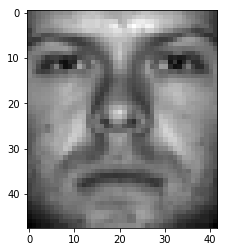

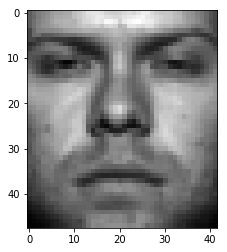

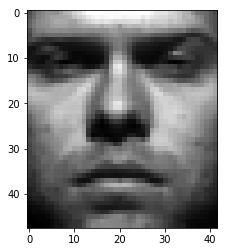

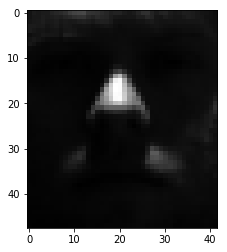

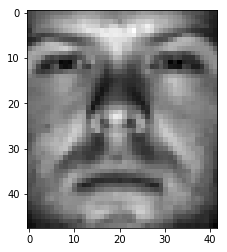

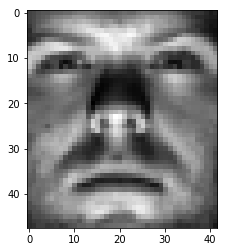

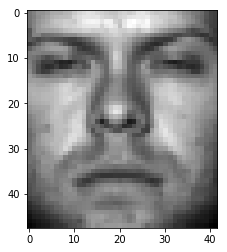

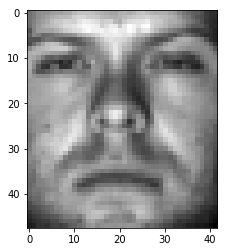

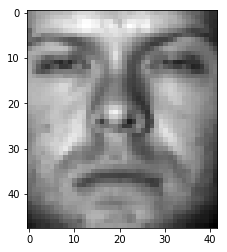

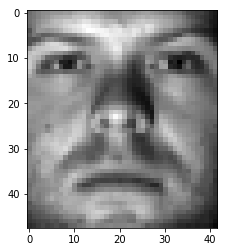

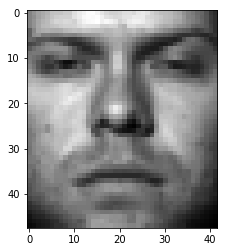

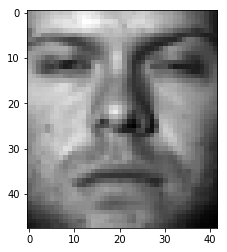

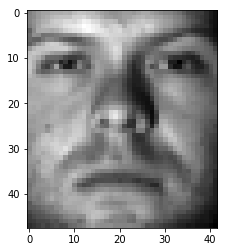

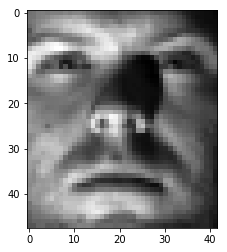

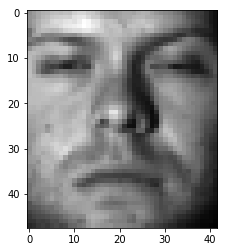

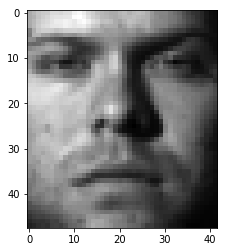

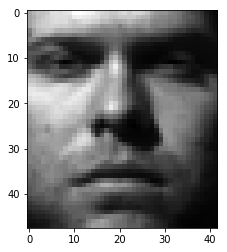

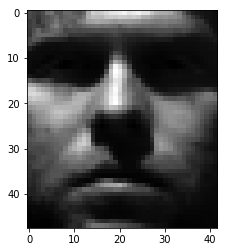

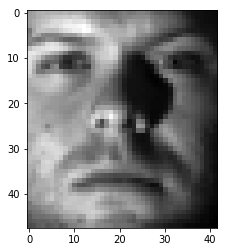

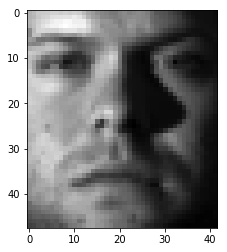

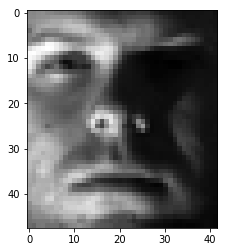

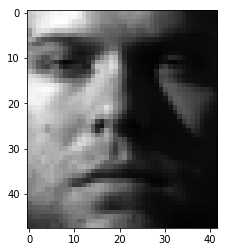

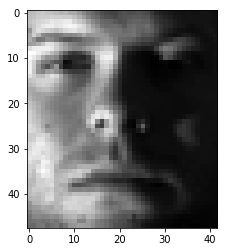

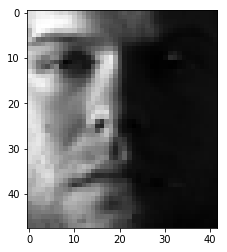

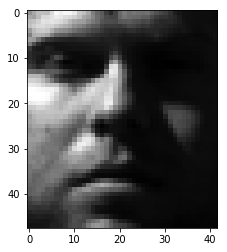

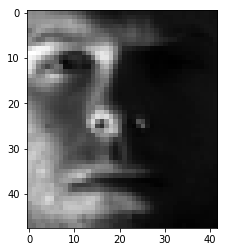

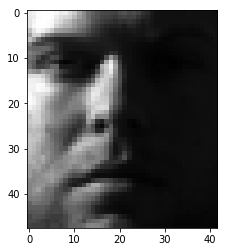

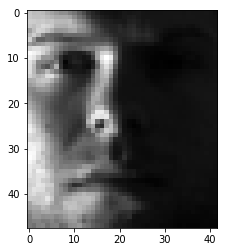

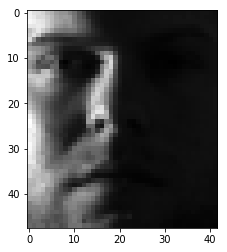

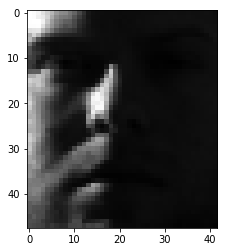

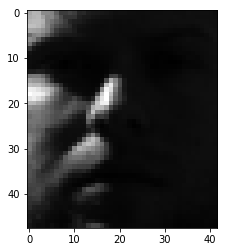

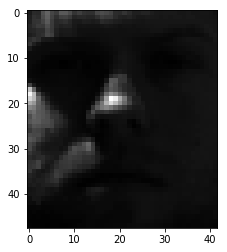

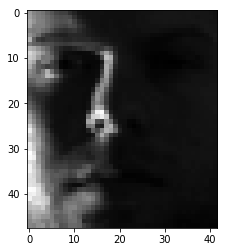

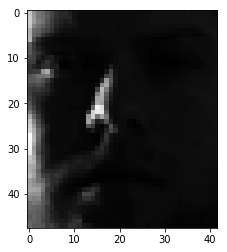

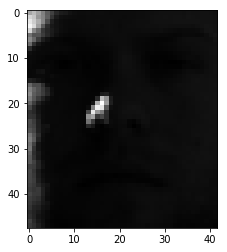

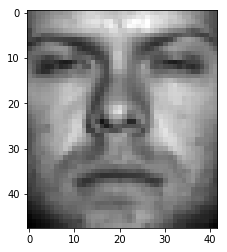

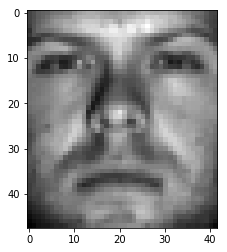

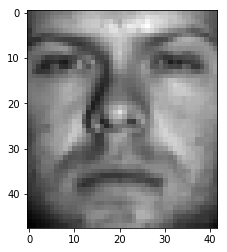

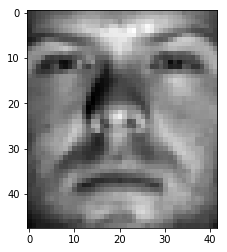

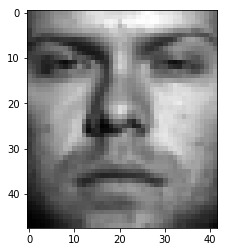

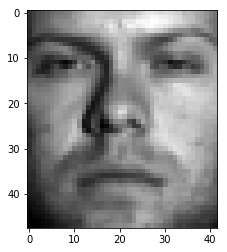

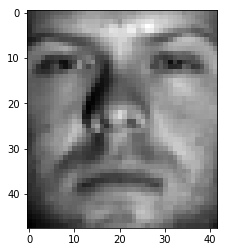

KeyboardInterrupt: 

In [4]:
fig, ax = plt.subplots()
for i in range(0,yalefaces.shape[2]):
    x = yalefaces[:,:,i]
    ax.imshow(x, extent=[0, 1, 0, 1]) 
    plt.imshow(x, cmap=plt.get_cmap('gray'))
    #time.sleep(0.1) 
    plt.show()

In [12]:
def Vector(X):
    d1, d2, n = X.shape
    X = X.reshape((d1*d2,n))
    return X

def Center(X):
    p, n = X.shape
    X_sd = np.std(X, axis = 1)
    #identity = np.identity(p)
    column = np.ones(n).reshape((n,1))
    X_bar = np.mean(X, axis = 1).reshape((-1,1))
    X_center = X - X_bar.dot(column.T)
    return X_center

def SVD(X):
    V,D = np.linalg.eig(X.dot(X.T))
    Vsort = np.sort(V,axis = 0)[::-1]
    #print(Vsort.shape)
    VsortInd = np.argsort(V,axis =0)[::-1]
    D = D[:,VsortInd] 
    V = np.copy(Vsort) 
    return V,D

def EvaluateComponents(V, percent):
    value = sum(V)
    kvalue = 0
    for i in range(0,V.shape[0]):
        kvalue = kvalue + V[i]
        if float(kvalue)/float(value) > percent:
            k = i+1
            break
    reduction = 1-(float(k)/float(V.shape[0]))
    return k, reduction

In [13]:
X = Center(Vector(yalefaces))
#print(X.shape) # (2016, 2414)
V,D = SVD(X)

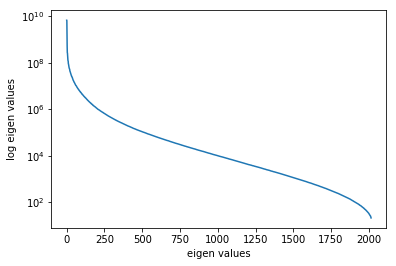

In [14]:
plt.semilogy(V) 
plt.ylabel('log eigen values')
plt.xlabel('eigen values')
plt.show()

In [15]:
k1, reduction1 = EvaluateComponents(V, 0.95)
print(k1, reduction1)
k2, reduction2 = EvaluateComponents(V, 0.99)
print(k2, reduction2)

43 0.9786706349206349
167 0.9171626984126984


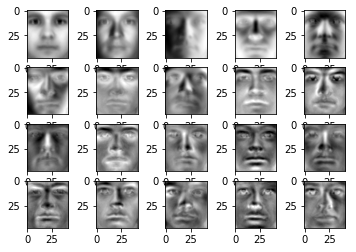

In [17]:
eigvalue0 = np.reshape(np.mean(Vector(yalefaces),axis=1), [d1,d2])
fig, ax = plt.subplots(4, 5) 
for i in range(0,4):
    for j in range(0,5):
        if i == 0 and j ==0:
            ax[i, j].imshow(eigvalue0, cmap=plt.get_cmap('gray')) 
        else:
            eigvaluek = np.reshape(D[:,i*5+j-1],[d1,d2])
            ax[i, j].imshow(eigvaluek, cmap=plt.get_cmap('gray'))
plt.show()